# SLT-CE-2: Deterministic Annealing

### References

<ol>
<li> Sections II.A.1 (principled derivation of deterministic annealing) and II.A.3 (Mass-constrained clustering) of 'Deterministic annealing for clustering, compression, classification, regression, and related optimization problems', Kenneth Rose, 1998, http://ieeexplore.ieee.org/document/726788/ 
</li>

<li>
The wine data set, http://www3.dsi.uminho.pt/pcortez/wine5.pdf
</li>
    
</ol>

### Setup 

In [1]:
import sklearn as skl
from sklearn.utils.validation import check_is_fitted
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
import sklearn.svm as svm
from sklearn import cluster

import pandas as pd
import numpy as np
from treelib import Tree

import matplotlib.pyplot as plt
from matplotlib import cm


LEGI = 19917558

<h2 style="background-color:#f0b375;">
Section 4.0
<span style=font-size:50%> Complete all problems in this and previous sections to get a grade of 4.0 </span>
</h2>

<p style="background-color:#adebad;">
    For this exercise, it is of utmost importance to read reference [1] about deterministic annealing clustering (DAC). Our implementation will be based on this reference. Please shortly summarize what they refer to as the <i>preferred implementation</i> of the DAC algorithm.
</p>

The authors in [1] use the mass-constrained approach as regularization method in their "preferred implementation".  By imposing a constraint on the total mass of the clusters, the mass-constrained approach can prevent the algorithm from creating clusters that are too complex or that overfit the data. A sketch of the "preferred implementation" of the DAC algorithm is given by the pseudocode:

1) **Set Limits**: number of codevectors $K_{\max }$, minimum temperature $T_{\min }$.
2) **Initialize**: $T>2 \lambda_{\max }\left(C_x\right), K=1, y_1=\sum_x x p(x)$, and $p\left(y_1\right)=1$.
3) **For** $i=1, \ldots, K$ **do**
    
    $$
        \begin{aligned}
    p\left(y_i \mid x\right) & =\frac{p\left(y_i\right) e^{-\left(\left(x-y_i\right)^2 / T\right)}}{\sum_{j=1}^K p\left(y_j\right) e^{-\left(\left(x-y_j\right)^2 / T\right)}} \\
    p\left(y_i\right) & =\sum_x p(x) p\left(y_i \mid x\right) .
    \end{aligned}
    $$

    
    $$
    y_i=\frac{\sum_x x p(x) p\left(y_i \mid x\right)}{p\left(y_i\right)}
    $$

4) **If** convergence criterium met *stop*, **else** repeat step 3).
5) If $T \leq T_{\min }$, perform last iteration for $T=0$ and *stop*.
6) **Cooling schedule**: update temperatur parameter  $T \leftarrow \alpha T,(\alpha<1)$.
7) If $K<K_{\max }$, check condition for phase transition for $i=1, \ldots, K$. If critical $T$ is reached for cluster $j$, add a new codevector $y_{K+1}=y_j+\delta, p\left(y_{K+1}\right)=$ $p\left(y_j\right) / 2, p\left(y_j\right) \leftarrow p\left(y_j\right) / 2$ and increment $K$.
8) Go to 3).

<p style="background-color:#adebad;">
    In order to avoid headaches with numerical instabilities, we first try our algorithm on a simple artificially generated data as below. Run the bloc below to have a look at the data. Later when we have everything implemented, we will examine some real world data. 
</p>

Text(0.5, 1.0, 'Test data')

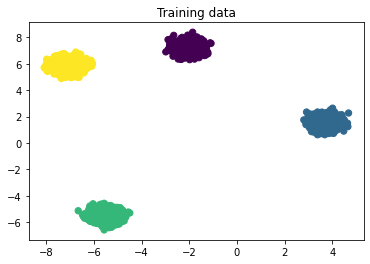

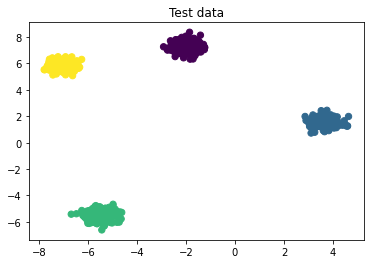

In [2]:
n_clusters = 4
ran_s = 42

# Generate artificial dataset
X, y_true = make_blobs(n_samples=7000, centers=4,
                       cluster_std=0.3, random_state=ran_s,
                       center_box=(-8.0, 8.0),
                       shuffle=False)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_true, train_size=6000, random_state=42)

plt.figure()
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=40, cmap='viridis')
plt.title("Training data")

plt.figure()
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=40, cmap='viridis')
plt.title("Test data")

<p style="background-color:#adebad;">
    Implement the <b>fit method</b> for the template class DeterministicAnnealing, according to the contract outlined in its docstring. (The template class DeterministicAnnealing is in file <b>DA.py</b> which you can open in your favourite IDE) For the implementation, it may help to take a look at both <b>get_distance method</b> and <b>fit _calculate_cluster_probs method</b> and implement them as well. Of course you are free to change all these methods or/and write additional methods for your purpose.
    You can add more class methods as necessary.
    See http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html for complementary information.
</p>
<p style="background-color:#adebad;">
    While implementing, you can run the bloc below to test your implementation.
</p>

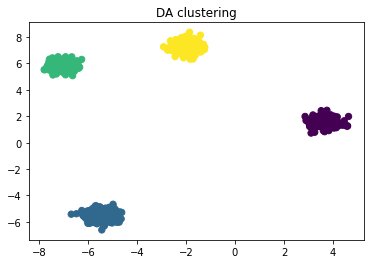

In [3]:
from DA import DeterministicAnnealingClustering
DAC = DeterministicAnnealingClustering(
    n_clusters=n_clusters, random_state=ran_s)
DAC.fit(X_train)
y_DAC = DAC.predict(X_test)
y_DAC_hard = np.argmax(y_DAC, axis=1)
plt.figure()
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_DAC_hard, s=40, cmap='viridis')
plt.title("DA clustering")
plt.show()

<h2 style="background-color:#f0b375;">
Section 4.5
<span style=font-size:50%> Complete all problems in this section to get an additional (+0.5) point to the previous points. Note that you can have a maximum of 6 points at the end.</span>
</h2>

<p style="background-color:#adebad;">
    In this section we implement a plot which will help us better understand the DA method, and could also be a help for better debugging of your implementation.
    
 <ul style="background-color:#adebad;">
        <li> 
            Modify your implementation of <b>fit</b> function such that <b>plot_phase_diagram</b> method will produce a plot similar to the phase diagram plot shown in Figure 2 of the reference paper.
        </li>
</ul>  
</p>

<ul style="background-color:#adebad;">
            For this, extend DAC.fit to save the expected distortion during annealing as an additional attribute self.distortion.
            You might also want to save the number of effective clusters and the temperature along the way.
    </ul>
</p>

#### extend DAC.fit(self, X):
    # ...
    # Save information for each (n-th) annealing step:
    # self.distortion = [d0, d1, d2, ...]
    # self.n_eff_clusters = [e0, e1, e2, ...]
    # self.temp = [t0, t1, t2, ...]
    # ...

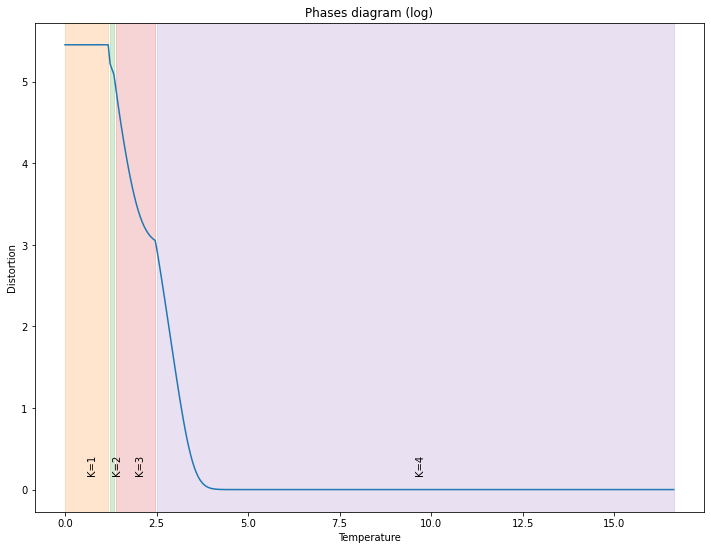

In [4]:
DAC.plot_phase_diagram()

<h2 style="background-color:#f0b375;">
Section 5.0
<span style=font-size:50%> Complete all problems in this section to get an additional (+0.5) point to the previous points.</span>
</h2>
<ul style="background-color:#adebad;">
Here we implement another plot which helps better undetrstad the dynamics of the algorithm.
        <li>
        Implement DAC.plot_bifurcation, which should create a bifurcation plot.<br>
        Modify DAC.fit to keep track of the distances, using the tree object DAC.bifurcation_tree. When a cluster splits, it creates two child nodes. Each node should store its centroid vector, and the distance to the parent centroid vector. After splitting, the parent node is not updated anymore.<br>
        In the bifurcation plot, the horizontal distance of a child node to its parent node should be exactly the distance to the parent centroid vector. The two child nodes should move in opposite directions, i.e. one to the left of the parent and one to the right.
        </li>
</ul>

This section could bit a bit annoying, you can also jump to the next sections and come back here later. 

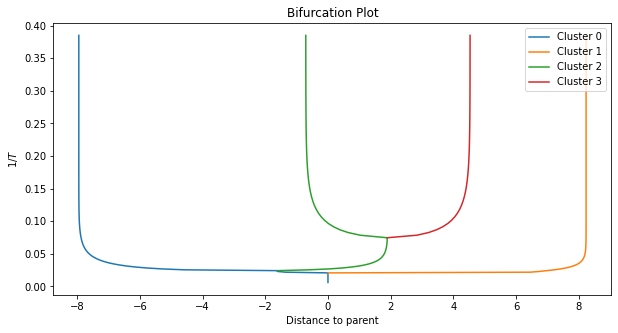

In [5]:
DAC.plot_bifurcation()

<h2 style="background-color:#f0b375;">
Section 5.5
<span style=font-size:50%> Complete all problems in this section to get an additional (+0.5) point to the previous points.</span>
</h2>

<p style="background-color:#adebad;">
Now we are ready to use some real world data. This might need some tweaking and handling of numberical instabilities. Please make sure your understand the data.
</p>

<p style="background-color:#adebad;">
Read the wine data [3], which contains 11 physiochemical attributes, and two labels (quality and color).
</p>

<p style="background-color:#adebad;">
    Create an instance of your DAC class with n_clusters = 2 and <b>fit the first 6000 samples</b> of the wine data set. Record the execution time. Furthermore, create an instance of the sklearn k-means class, and fit it with the same parameters. Again record the execution time. Make sure that the hyper parameters (initial temperature, min temperature, convergence criteria, noise, etc.) make sense and lead to a reasonable clustering
</p>

In [2]:
from DA import read_data_csv
from DA import DeterministicAnnealingClustering
X, y = read_data_csv("wine-data.csv", y_names=["quality", "color"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y["color"], train_size=6000, random_state=42)

X_train_quality, X_test_quality, y_train_quality, y_test_quality = train_test_split(
    X, y["quality"], train_size=6000, random_state=42)

y_test_quality = y_test_quality.flatten()

In [3]:
%%time
DAC = DeterministicAnnealingClustering(n_clusters=2, random_state=42, T_min=300, alpha = 0.98, threshold = 1e-4, tol = True, first_temperatur = False)
DAC.fit(X_train)

CPU times: user 7min 23s, sys: 52.1 s, total: 8min 15s
Wall time: 1min 15s


In [4]:
%%time
kmeans = cluster.KMeans(n_clusters=2,random_state=42)
kmeans.fit(X_train)

CPU times: user 588 ms, sys: 615 ms, total: 1.2 s
Wall time: 82.1 ms


KMeans(n_clusters=2, random_state=42)

In [5]:
%%time
y_kmeans = kmeans.predict(X_test)

CPU times: user 4.35 ms, sys: 2.34 ms, total: 6.69 ms
Wall time: 1.94 ms


In [6]:
%%time
y_DAC = DAC.predict(X_test)

CPU times: user 1.45 ms, sys: 816 µs, total: 2.26 ms
Wall time: 1.48 ms


<h2 style="background-color:#f0b375;">
Section 6.0
<span style=font-size:50%> Complete all problems in this section to get an additional (+0.5) point to the previous points.</span>
</h2>
<ul style="background-color:#adebad;">
<li> Before we can compute the confusion matrix, we need to perform some post-processing on the DAC cluster assignments.
    Explain what the function postprocess (defined below) does, and why we need it. To do so, complete the docstring of the function postprocess.
        </li>
</ul>

In [7]:
def postprocess(y_DAC, y_kmeans):
    """
    Map cluster's centroid's labels given by DAC to the ones of K-means. 
    This is done so that we can later build a confusion matrix (see next cell).

    Args:
        y_DAC (np.ndarray): Prob. of each data point to  belong to each centroid (new_samples, n_centroids)
        y_kmeans (np.ndarray): Index of center of each data point is mapped to by K-means. (new_samples, )
        
    Returns:
        np.ndarray: Index of center of each data point is mapped to by DAC, 
        following the orderdering of the vector y_kmeans. (new_samples, )
    """
    
    y_DAC_hard = np.argmax(y_DAC, axis=1)
    
    n_clusters = len(np.unique(y_DAC_hard))
    dac2kmeans = []
    for cluster in range(n_clusters):
        argmax = np.argmax(y_DAC[:, cluster])
        dac2kmeans.append(y_kmeans[argmax])
        
    y_DAC_new = []
    for dac_label in y_DAC_hard:
        y_DAC_new.append(dac2kmeans[dac_label])
    
    return np.array(y_DAC_new)

In [8]:
skl.metrics.confusion_matrix(y_kmeans, postprocess(y_DAC, y_kmeans))

array([[288,   0],
       [ 11, 198]])

</h2>

<ul style="background-color:#adebad;">
        <li> Read the docstring of <b>transform method</b> and understand what it does.
        </li>
        <li>
        Use DAC.transform and kmeans.transform to transform both, X_train and X_test. 
        </li>
       
</ul>

In [9]:
X_train_DAC = DAC.transform(X_train)
X_test_DAC = DAC.transform(X_test)

X_train_kmeans = kmeans.transform(X_train)
X_test_kmeans = kmeans.transform(X_test)

<ul style="background-color:#adebad;">
        <li>
        Fit an SVM classifier with default parameters to the untransformed data, and to the transformed data.
        Compare the performance of predicting whether the color of a wine is red or white.
        </li>
    </ul>

In [10]:
svm1 = svm.SVC(random_state=42)
svm1.fit(X_train, y_train.ravel())
svm1.score(X_test, y_test.ravel())

0.9275653923541247

In [11]:
svm_DAC = svm.SVC(random_state=42)
svm_DAC.fit(X_train_DAC, y_train.ravel())
svm_DAC.score(X_test_DAC, y_test.ravel())

0.9134808853118712

In [12]:
svm2 = svm.SVC(random_state=42)
svm2.fit(X_train_kmeans, y_train.ravel())
svm2.score(X_test_kmeans, y_test.ravel())

0.9134808853118712

<ul style="background-color:#adebad;">
        <li>
        Produce two scatter plots, one for X_train_DAC and one for X_train_kmeans.<br>
        Make the marker color indicate the wine color.
        </li>
    </ul>

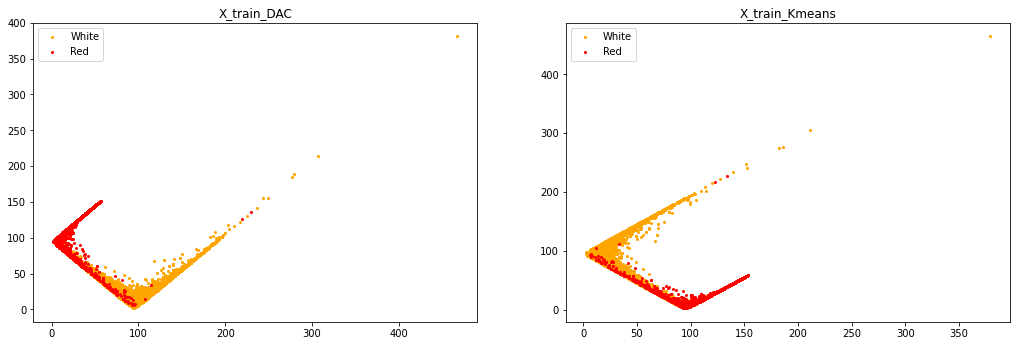

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17.5, 5.5))

mask_white = y_train == 'white'
mask_red = y_train == 'red'

ax1.scatter(X_train_DAC[mask_white.reshape(-1), 0], X_train_DAC[mask_white.reshape(-1), 1], s=4, c='orange', label='White')
ax1.scatter(X_train_DAC[mask_red.reshape(-1), 0], X_train_DAC[mask_red.reshape(-1), 1], s=4, c='red', label='Red')
ax1.legend()
ax1.set_title('X_train_DAC')

ax2.scatter(X_train_kmeans[mask_white.reshape(-1), 0], X_train_kmeans[mask_white.reshape(-1), 1], s=4, c='orange', label='White')
ax2.scatter(X_train_kmeans[mask_red.reshape(-1), 0], X_train_kmeans[mask_red.reshape(-1), 1], s=4, c='red', label='Red')
ax2.legend()
ax2.set_title('X_train_Kmeans')

plt.show()


<ul style="background-color:#adebad;">
    <li>
        Create a fixed 2D embedding (e.g. with LLE, t-SNE, MDS) of the wine data and color the markers according to quality and color. Fit and transform X_train with DAC(n_clusters=2,3,4,5,6,7,8,...). Produce a plot of the SVM score svm_DAC.score(X_test_DAC, y_test) as a function of n_clusters.. Each time use marker shapes to display the cluster memberships, and compare to the labels color and quality.
    </li>
</ul>

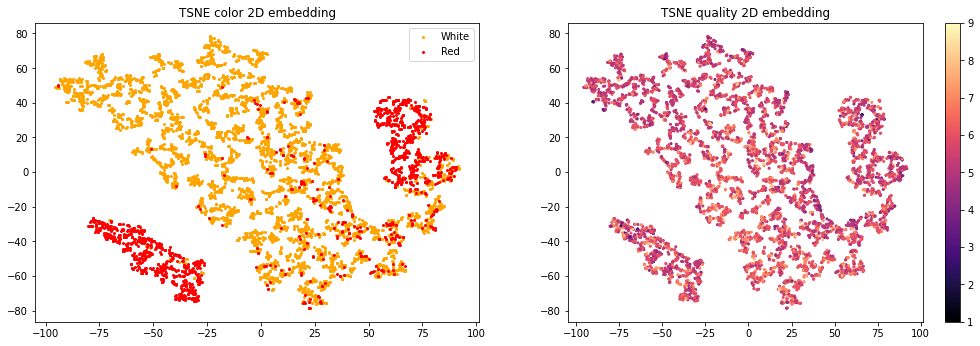

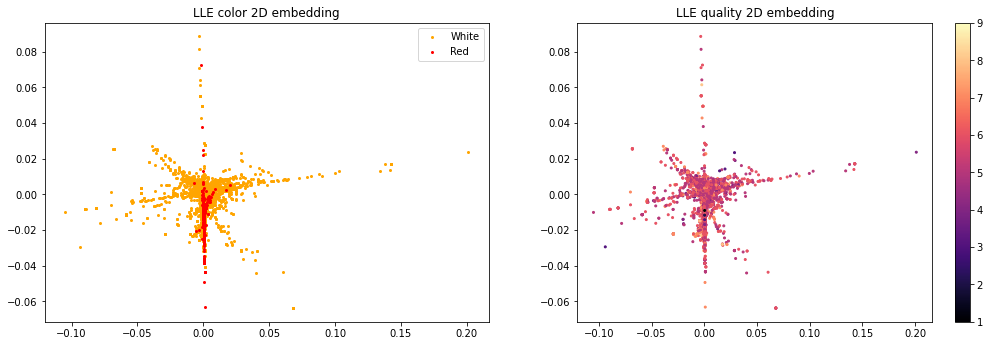

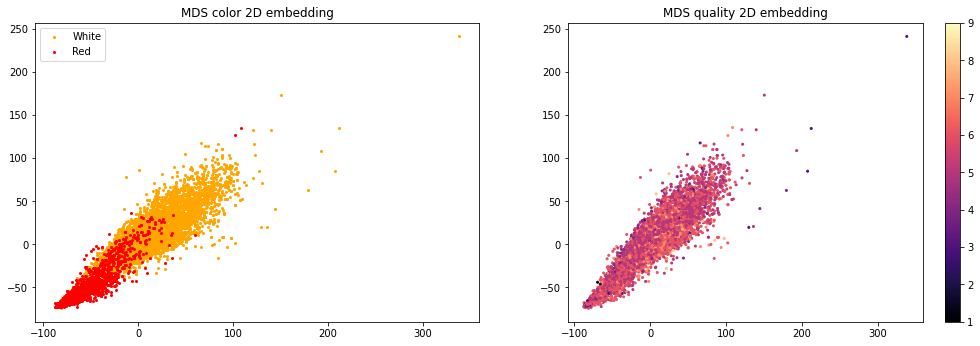

CPU times: user 35min 24s, sys: 8min 7s, total: 43min 32s
Wall time: 13min 22s


In [14]:
%%time
import warnings
warnings.filterwarnings("ignore")
from sklearn.manifold import TSNE
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import MDS

emb_vec = ["TSNE", "LLE", "MDS"] 
seed = 42

for emb_type in emb_vec:
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(17.5, 5.5))

    if emb_type == "TSNE":
        embedding = TSNE(n_components=2, random_state=seed).fit_transform(X)
    elif emb_type == "MDS":
        embedding = MDS(n_components=2, random_state=seed).fit_transform(X)
    else:
        embedding = LocallyLinearEmbedding(n_components=2, random_state=seed).fit_transform(X)

    mask_white = y['color'] == 'white'
    mask_red = y['color'] == 'red'

    ax1.scatter(embedding[mask_white.reshape(-1),0], embedding[mask_white.reshape(-1),1], s=4, c='orange', label='White')
    ax1.scatter(embedding[mask_red.reshape(-1),0], embedding[mask_red.reshape(-1),1], s=4, c='red', label='Red')
    ax1.legend()
    ax1.set_title(f'{emb_type} color 2D embedding')

    quality_embedding_plot = ax2.scatter(embedding[:,0], embedding[:,1], c=y['quality'].flatten(), s=4, cmap='magma')
    ax2.set_title(f'{emb_type} quality 2D embedding')
    fig.colorbar(quality_embedding_plot)

    plt.show()


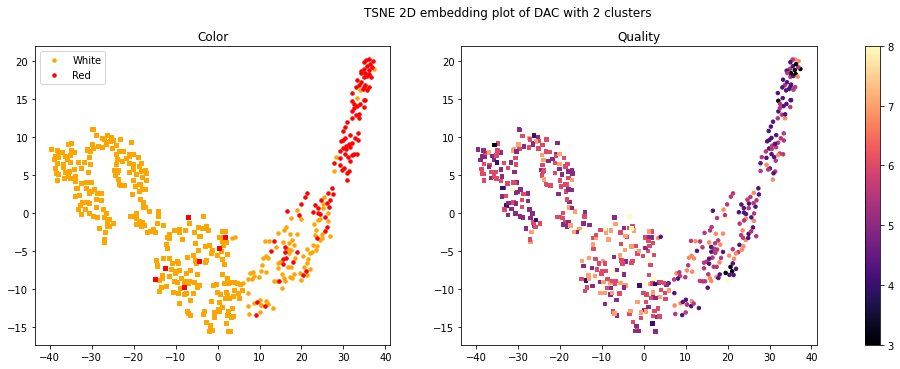

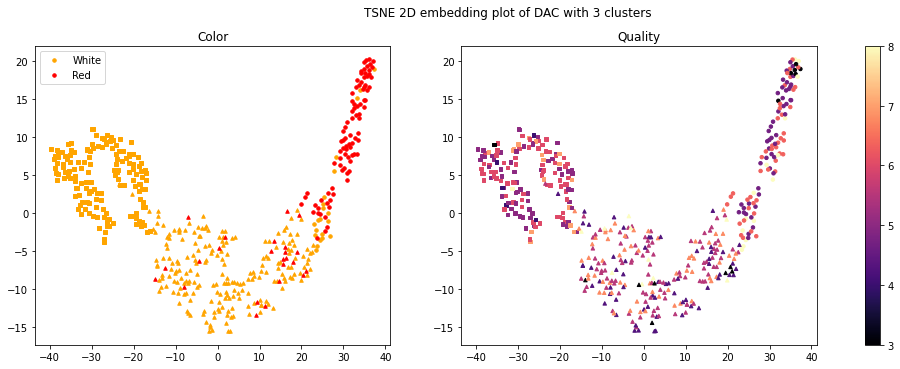

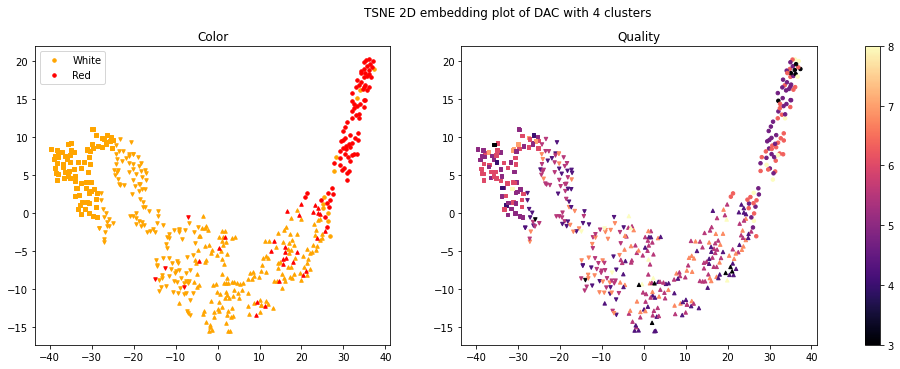

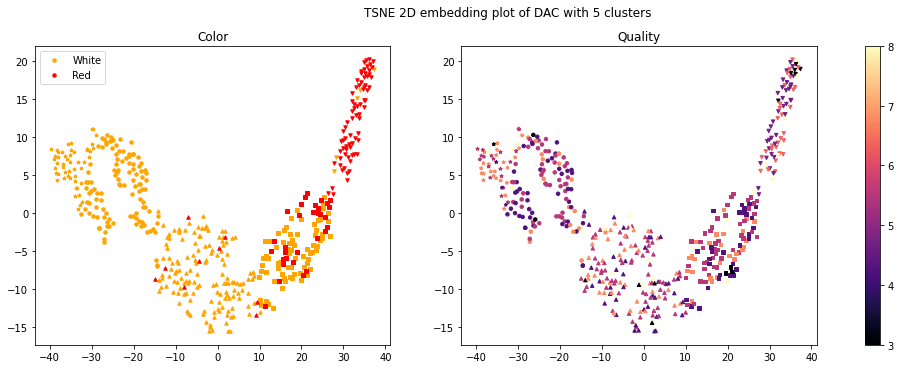

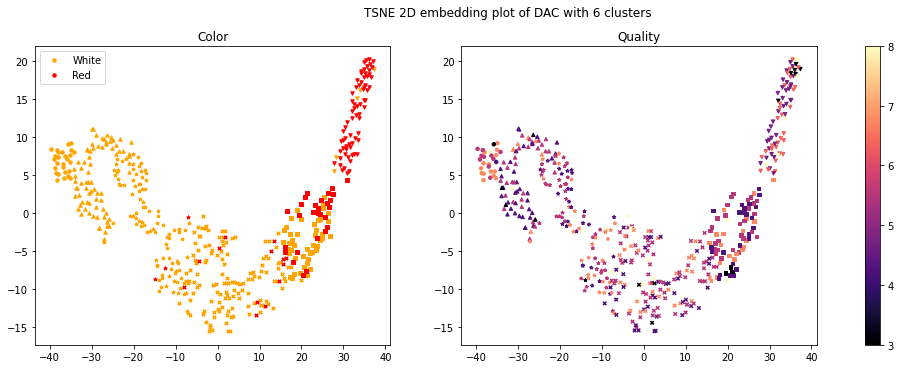

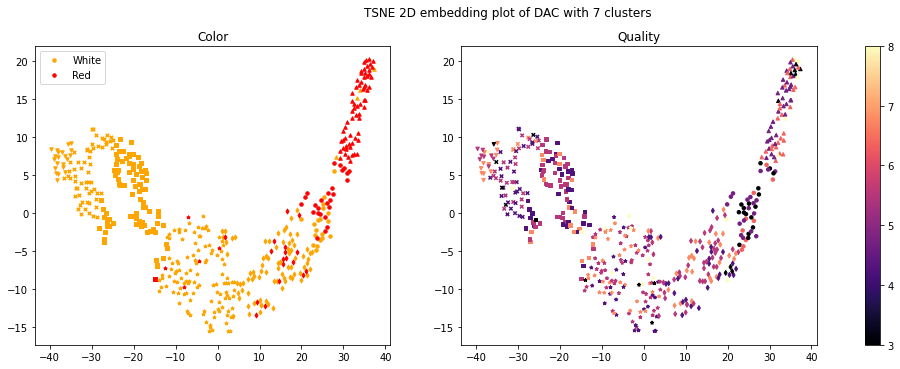

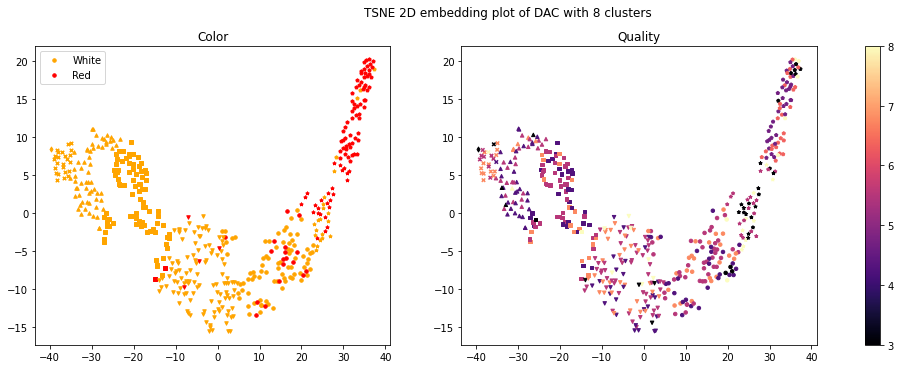

In [5]:
from sklearn.manifold import TSNE
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import MDS
from matplotlib import cm
import warnings
warnings.filterwarnings("ignore")
seed = 42

embedding_TSNE= TSNE(n_components = 2, random_state=seed).fit_transform(X_test)
#embedding_MDS = MDS(n_components=2, random_state=seed).fit_transform(X_test)
#embedding_LLE = LocallyLinearEmbedding(n_components=2, random_state=seed).fit_transform(X_test)

embeddings = [(embedding_TSNE, "TSNE")]#, (embedding_LLE, "LLE"), (embedding_MDS, "MDS")]
scores = []
K_max = 9

num_clusters = list(range(2, K_max))


markers = ["o", "s", "^", "v", "*", "x", "d", "p"]

mask_white = np.where((y_test == 'white') == True)[0]
mask_red = np.where((y_test == 'red') == True)[0]

for i in num_clusters:
    DAC = DeterministicAnnealingClustering(n_clusters=i, random_state=42, T_min=300, alpha = 0.98, threshold = 1e-4, tol = True, first_temperatur = False)
    DAC.fit(X_train)

    X_train_DAC = DAC.transform(X_train)
    X_test_DAC = DAC.transform(X_test)

    svm_DAC_runs = svm.SVC(random_state=42)
    svm_DAC_runs.fit(X_train_DAC, y_train.ravel())
    score = svm_DAC_runs.score(X_test_DAC, y_test.ravel())
    scores.append(score)

    y_DAC_hard = np.argmax(DAC.predict(X_test), axis = 1)
    clusters = {j: np.where(y_DAC_hard == j)[0] for j in range(i)}

    for embedding_test, name in embeddings:
        fig, axs = plt.subplots(1, 2, figsize=(17.5,5.5))
        plt.suptitle(f"{name} 2D embedding plot of DAC with " + str(i) + " clusters") 
        for j in range(i):
            axs[0].scatter(embedding_test[np.intersect1d(mask_white,clusters[j]),0], embedding_test[np.intersect1d(mask_white,clusters[j]),1],  marker=markers[j], s=12, c ="orange", label = "White")
            axs[0].scatter(embedding_test[np.intersect1d(mask_red,clusters[j]),0], embedding_test[np.intersect1d(mask_red,clusters[j]),1],  marker=markers[j], s=12, c ="red", label = "Red")
            axs[1].scatter(embedding_test[y_DAC_hard == j, 0], embedding_test[y_DAC_hard == j, 1], c=y_test_quality[y_DAC_hard == j], marker=markers[j], s=12, cmap='magma')
            if j == 0:
                axs[0].legend(numpoints = 1)

        axs[0].set_title("Color")
        axs[1].set_title("Quality")
        m = cm.ScalarMappable(cmap='magma')
        m.set_array(y_test_quality)
        fig.colorbar(m, ax=axs.ravel().tolist())

    plt.show()

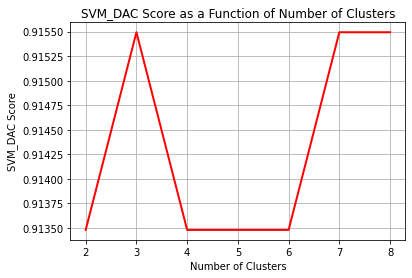

In [6]:
plt.plot(num_clusters, scores, color='red', linewidth=2)
plt.xlabel('Number of Clusters')
plt.ylabel('SVM_DAC Score')
plt.title('SVM_DAC Score as a Function of Number of Clusters')
plt.grid(True)
plt.show()

<ul style="background-color:#adebad;">
        <li>
            So far, our implementation of DAC assumed that our data is compatible with the euclidian metric. Argue why this assumption is not justified for the wine-data. Suggest a better alternative (no implementation required!).
        </li>
    </ul>
</p>



The assumption that the wine dataset is compatible with the Euclidean metric may not be justified by the following reason: the Euclidean distance assumes that the features are scales-dependent. This may not be the case for the wine dataset, which may have features that are not directly comparable due to differences in their units, magnitudes, or measurement scales.

To address these issues, a more appropriate distance metric is proposed in *A Ratio Scale Metric and the Compatibility of Ratio Scales: The Possibility of Arrow’s Impossibility Theorem, T.L. Saalty, 1994*. In the reference, the authors propose a distance that is more appropriate for ratio-scaled data, like the wine dataset, where the ratios between feature values are meaningful. This distance is basically defined as the logarithmic transformation of the geometric mean of the ratios of the feature values. This metric takes into account the relative differences between the feature values and reduces the impact of outliers and noise. 

$d(x,y)=\log{\frac{1}{d^2} \sum_{i,j=1}^d \frac{x_i}{x_j} \frac{y_j}{y_i}}$

where $x$ and $y$ are two $d$ dimension vectors.